### **RANDOM FOREST**

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, skew, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC as SVR
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
import random

In [285]:
x,y = make_classification(n_features=5,n_redundant=0
                          , n_informative=5,n_clusters_per_class=1)

In [286]:
df = pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.333717,-0.536647,-1.129085,-0.225129,4.131760,1
1,0.075138,0.463727,-0.525952,1.102667,1.340746,1
2,3.804964,-2.331674,-0.318049,2.060220,3.674863,0
3,-1.661685,-2.547619,-1.455116,0.386765,2.219818,1
4,-0.501061,-0.971971,-0.429552,-1.707761,0.051578,0


### **FUNCTION FOR ROW SAMPLING**

In [339]:
#function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

### **FUNCTION FOR FEATURE SAMPLING**

In [323]:
#function for feature sampling

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1], int(percent*df.shape[1]))


  new_df=df[cols]
  new_df['target']=df['target']
  return new_df

### **FUNCTION FOR COMBINED SAMPLING**

In [324]:
#function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df=sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

### **ROW SAMPLING FITTING**

In [346]:
df1=sample_rows(df,0.5)

In [347]:
df2 = sample_rows(df,0.6)

In [348]:
df3 = sample_rows(df,0.8)

### **FEATURE SAMPLING FITTING**

In [349]:
df1 = sample_features(df, 0.8)

<ipython-input-323-1bd21287ccfb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [350]:
df2 = sample_features(df, 0.75)

<ipython-input-323-1bd21287ccfb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [351]:
df3 = sample_features(df, 0.7)

<ipython-input-323-1bd21287ccfb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


### **COMBINED SAMPLING FITTING**

In [352]:
df1 = combined_sampling(df, 0.8,0.4)

<ipython-input-323-1bd21287ccfb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [353]:
df2 = combined_sampling(df, 0.75,0.6)

<ipython-input-323-1bd21287ccfb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [354]:
df3 = combined_sampling(df, 0.7,0.8)

<ipython-input-323-1bd21287ccfb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


### **DATAFRAMES (DF1,DF2,DF3)**

In [355]:
df1

,col5,col2,target
59,1.290337,-1.215590,0
91,0.923046,0.376669,1
71,2.209139,0.075625,0
43,0.876078,-4.348601,1
67,1.340657,-1.184956,1
...,...,...,...
77,1.069448,-1.726500,0
53,4.987215,-2.478250,1
50,1.474991,-1.403611,0
78,5.734517,-0.463630,1


In [356]:
df2

,col2,col3,col1,target
2,-2.331674,-0.318049,3.804964,0
97,2.584835,0.034273,0.748424,1
73,-0.133925,-1.237209,-0.352037,1
30,-0.802040,-1.974055,1.707932,0
53,-2.478250,-0.066438,-1.466860,1
...,...,...,...,...
36,-0.068355,-1.551371,2.574919,0
42,1.523165,-4.018716,-0.121902,1
57,-0.472976,-0.490661,-1.311726,1
20,-0.238863,-0.252391,-0.375683,0


In [357]:
df3

,col3,col2,col4,col5,target
45,-2.070585,0.678458,-2.046256,-0.290677,0
45,-2.070585,0.678458,-2.046256,-0.290677,0
8,-1.473900,-0.612098,-2.465737,0.091216,0
94,-0.266394,0.674288,0.195562,2.266011,1
18,0.224530,-2.124569,-0.095407,3.846059,1
...,...,...,...,...,...
75,1.766274,-1.093994,0.326237,0.671663,1
63,-2.697483,-1.442844,0.706008,1.253620,1
97,0.034273,2.584835,2.981102,2.285179,1
35,-2.113636,-1.860914,0.659278,0.963277,1


### **DATAFRAME SHAPES**

In [305]:
df1.shape

(100, 6)

In [306]:
df2.shape

(100, 6)

In [307]:
df3.shape

(100, 6)

### **IMPORTING THE ML ALGORITHM**

In [308]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

### **FITTING THE ALGORITHM**

In [364]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:3],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

### **PLOTTING THE TREES**

[Text(0.5568181818181818, 0.9285714285714286, 'x[0] <= 4.13\ngini = 0.5\nsamples = 80\nvalue = [41, 39]'),
 Text(0.5113636363636364, 0.7857142857142857, 'x[0] <= 1.451\ngini = 0.492\nsamples = 73\nvalue = [41, 32]'),
 Text(0.5340909090909091, 0.8571428571428572, 'True  '),
 Text(0.25, 0.6428571428571429, 'x[0] <= 0.651\ngini = 0.498\nsamples = 47\nvalue = [22, 25]'),
 Text(0.09090909090909091, 0.5, 'x[1] <= -1.812\ngini = 0.434\nsamples = 22\nvalue = [15.0, 7.0]'),
 Text(0.045454545454545456, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13636363636363635, 0.35714285714285715, 'x[0] <= -1.82\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.09090909090909091, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.18181818181818182, 0.21428571428571427, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.4090909090909091, 0.5, 'x[1] <= -1.189\ngini = 0.403\nsamples = 25\nvalue = [7.0, 18.0]'),
 Text(0.3181818181818182, 0.3571428571428

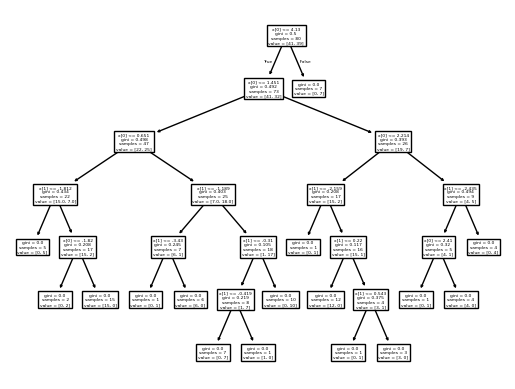

In [371]:
plot_tree(clf1)

[Text(0.5, 0.9375, 'x[2] <= 0.842\ngini = 0.493\nsamples = 75\nvalue = [33.0, 42.0]'),
 Text(0.4230769230769231, 0.8125, 'x[1] <= -1.468\ngini = 0.42\nsamples = 60\nvalue = [18, 42]'),
 Text(0.46153846153846156, 0.875, 'True  '),
 Text(0.15384615384615385, 0.6875, 'x[1] <= -3.466\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(0.07692307692307693, 0.5625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.23076923076923078, 0.5625, 'x[0] <= -1.072\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3076923076923077, 0.4375, 'x[2] <= -1.75\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.23076923076923078, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38461538461538464, 0.3125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6923076923076923, 0.6875, 'x[2] <= 0.097\ngini = 0.308\nsamples = 42\nvalue = [8, 34]'),
 Text(0.5384615384615384, 0.5625, 'x[0] <= -0.396\ngini = 0.

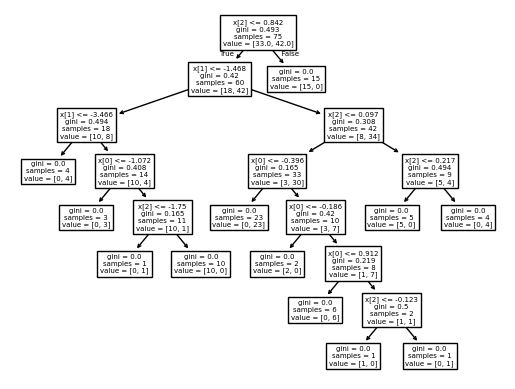

In [372]:
plot_tree(clf2)

[Text(0.36764705882352944, 0.9166666666666666, 'x[2] <= -0.543\ngini = 0.485\nsamples = 70\nvalue = [41.0, 29.0]'),
 Text(0.17647058823529413, 0.75, 'x[1] <= -2.361\ngini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.2720588235294118, 0.8333333333333333, 'True  '),
 Text(0.11764705882352941, 0.5833333333333334, 'x[0] <= -2.274\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23529411764705882, 0.5833333333333334, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.5588235294117647, 0.75, 'x[3] <= 1.491\ngini = 0.36\nsamples = 34\nvalue = [8, 26]'),
 Text(0.4632352941176471, 0.8333333333333333, '  False'),
 Text(0.35294117647058826, 0.5833333333333334, 'x[1] <= 0.7\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.29411764705882354, 0.4166666666666667, 'gini = 0.0\nsamples = 15\nvalue = [0, 

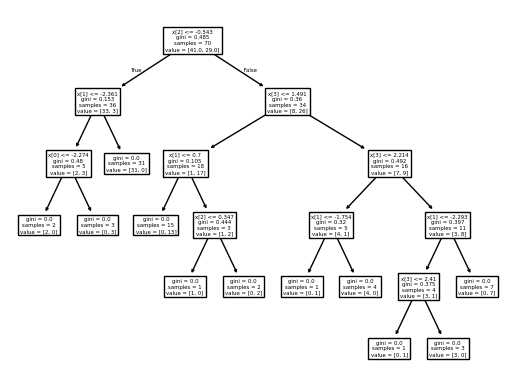

In [373]:
plot_tree(clf3)

### **PREDICTING THE FITTED ALGORITHM**

In [368]:
clf1.predict(np.array([	1.290337,	-1.215590]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [369]:
clf2.predict(np.array([2.584835,	0.034273,	0.748424	]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [370]:
clf3.predict(np.array([-2.070585,	0.678458,	-2.046256,	-0.290677]).reshape(1,4))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])